# NYC Flights

**By Gaurav Padawe - 25th August, 2018**

In this project I'm performing EDA on NY Flight Dataset.

Dataset contains 336776 rows and 19 Features.

Lots of Questions Arising after looking at Dataset. Few of them are as follows:

- How many unique flights observed in all NY Airports (JFK, LGA and EWR) in 2013 ?
- Given Dep Delay/Arr Delay, in which month we observe most delays ?
- Most frequently travelled Destination from NY Airports ?
- Which hour in a day we get to observe max/min delays in Dep/Arr ?
- What is the Avg. time taken by a airplane to travel most frequently visited destination from respective Airport ?

Plus many questions arised while performing Analysis. Let us dive right into it and do some basic analysis and visualisations.

- Setting Path

In [247]:
path = "D:/Data Science/DS Prac/EDA/Project Datasets/NYC-Flight_data/Project_1_NYC-Flight data/"

- Importing Required Packages

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

- Reading provided CSV file

In [249]:
flight = pd.read_csv(path+"flight_data.csv")
flight.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


- Checking for NaN Values

In [250]:
flight.isnull().any()

year              False
month             False
day               False
dep_time           True
sched_dep_time    False
dep_delay          True
arr_time           True
sched_arr_time    False
arr_delay          True
carrier           False
flight            False
tailnum            True
origin            False
dest              False
air_time           True
distance          False
hour              False
minute            False
time_hour         False
dtype: bool

- Creating new Dataframe and replacing NaN values with mean and tailnum with mode and creating new column called "speed" for each individual flight

In [251]:
flight_df = pd.DataFrame({'year':flight.year,
                           'month':flight.month,
                           'day':flight.day,
                          'dep_time':flight['dep_time'].fillna(flight['dep_time'].mean()),
                          'sched_dep_time':flight.sched_dep_time,
                          'dep_delay':flight['dep_delay'].fillna(flight['dep_delay'].mean()),
                          'arr_time':flight['arr_time'].fillna(flight['arr_time'].mean()),
                          'sched_arr_time':flight.sched_arr_time,
                          'arr_delay':flight['arr_delay'].fillna(flight['arr_delay'].mean()),
                          'carrier':flight.carrier,
                          'flight':flight['flight'],
                          'tailnum':flight['tailnum'].fillna(flight['tailnum'].mode()[0]),
                          'origin':flight.origin,
                          'dest':flight.dest,
                          'air_time':flight['air_time'].fillna(flight['air_time'].mean()),
                          'distance':flight.distance,
                          'hour':flight.hour,
                          'minute':flight.minute,
                          'time_hour':flight.time_hour}, 
                          columns=['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay','arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight','tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute','time_hour'])

flight_df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


In [252]:
flight_df['speed'] = flight_df['distance']/ flight_df['hour']+(flight_df['minute']/60)
flight_df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,speed
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00,280.250000
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00,283.683333
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00,218.466667
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00,315.950000
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00,127.000000


- Re-checking if NaN values are replaced

In [253]:
flight_df.isnull().any()

year              False
month             False
day               False
dep_time          False
sched_dep_time    False
dep_delay         False
arr_time          False
sched_arr_time    False
arr_delay         False
carrier           False
flight            False
tailnum           False
origin            False
dest              False
air_time          False
distance          False
hour              False
minute            False
time_hour         False
speed             False
dtype: bool

- Checking Dtypes of all features we have

In [254]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 20 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          336776 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         336776 non-null float64
arr_time          336776 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         336776 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           336776 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          336776 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
speed             336776 non-null float64
dtypes: float64(6), int64(9), object(5)
memory usage: 51.4+ MB


- Getting Insight/Overview of Data that we have 

In [255]:
flight_df.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute,speed
count,336776.0,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100,92.541968
std,0.0,3.414457,8.768607,482.260302,467.335756,39.714191,526.320657,497.457142,44.003969,1632.471938,92.367314,733.233033,4.661316,19.300846,78.689512
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000,4.000000
25%,2013.0,4.000000,8.000000,915.000000,906.000000,-5.000000,1110.000000,1124.000000,-16.000000,553.000000,84.000000,502.000000,9.000000,8.000000,37.400000
50%,2013.0,7.000000,16.000000,1349.109947,1359.000000,-1.000000,1518.000000,1556.000000,-4.000000,1496.000000,132.000000,872.000000,13.000000,29.000000,68.647059
75%,2013.0,10.000000,23.000000,1737.000000,1729.000000,12.639070,1934.000000,1945.000000,13.000000,3465.000000,188.000000,1389.000000,17.000000,44.000000,125.708333
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000,554.166667


- Finding Co-relation between each features

In [256]:
co_rel = flight_df.corr()*100
co_rel

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute,speed
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,100.000000,0.294235,-0.388158,-0.457264,-1.979772,-0.248613,-0.417274,-1.713186,-0.083408,1.076694,2.163565,-0.522740,1.552767,1.617446
day,NaN,0.294235,100.000000,-0.046199,-0.001439,0.041517,-0.547004,-0.240276,-0.031497,-0.179075,0.220705,0.304130,-0.005528,0.098667,0.241232
dep_time,NaN,-0.388158,-0.046199,100.000000,94.274073,26.023123,66.029680,77.563983,23.190805,4.117168,-1.459445,-1.387604,94.143165,9.043327,-45.185676
sched_dep_time,NaN,-0.457264,-0.001439,94.274073,100.000000,19.641242,63.431314,78.334248,17.147268,3.649471,-1.531567,-1.799496,99.914829,8.295976,-47.337879
dep_delay,NaN,-1.979772,0.041517,26.023123,19.641242,100.000000,2.862077,15.863905,90.988663,5.370913,-2.228467,-2.148165,19.575689,2.808576,-10.455249
arr_time,NaN,-0.248613,-0.547004,66.029680,63.431314,2.862077,100.000000,77.943529,2.443816,2.454998,5.419848,4.655182,63.427780,4.042838,-27.320501
sched_arr_time,NaN,-0.417274,-0.240276,77.563983,78.334248,15.863905,77.943529,100.000000,13.152018,2.159365,7.788721,6.872592,78.328251,5.032122,-31.320838
arr_delay,NaN,-1.713186,-0.031497,23.190805,17.147268,90.988663,2.443816,13.152018,100.000000,7.135297,-3.529709,-6.121800,17.103729,2.121334,-12.855690
flight,NaN,-0.083408,-0.179075,4.117168,3.649471,5.370913,2.454998,2.159365,7.135297,100.000000,-46.304501,-48.416537,3.583801,1.813664,-41.223463


- Plotting the Co-relation in heatmap

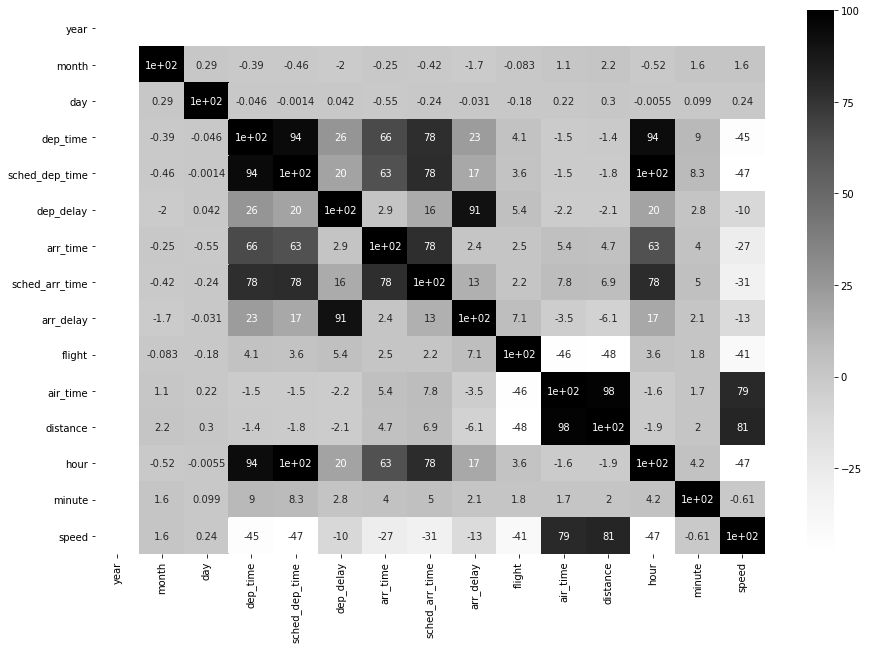

In [257]:
plt.figure(1, figsize=(15,10))
sns.heatmap(co_rel, annot=True, cmap="Greys")

- How many flights got delayed (on daily basis) ?

Ans: As we can see below that on 1st January total 356 flights got delayed, on 2nd January the count went up to 458 flights and so on we can observe each day delays.

In [258]:
delayed_dep = flight_df[flight_df['dep_delay'] > 0]
delayed_dep_day = pd.pivot_table(delayed_dep, index=['month','day'], values=['dep_delay'], aggfunc='count')
delayed_dep_day.head()

dep_delay
month day           
1     1          356
      2          458
      3          423
      4          397
      5          271

- Max and Min number of Flights got delayed in departing 

Ans: Max: On 8th March max number of flights got delayed - 833 Flights,
     Min: On 29th Nov. min number of flights got delayed - 131 Flights

In [259]:
print (delayed_dep_day.max(), delayed_dep_day.idxmax())

print (delayed_dep_day.min(), delayed_dep_day.idxmin())

dep_delay    833
dtype: int64 dep_delay    (3, 8)
dtype: object
dep_delay    131
dtype: int64 dep_delay    (11, 29)
dtype: object


- We can also get total number of flights which got delayed every month for better visuals.

Jul    14849
Dec    14575
Jun    13664
Aug    12199
Mar    12070
May    11854
Apr    11211
Feb    10385
Jan    10183
Oct     8958
Nov     8472
Sep     8267
Name: month, dtype: int64


Text(0,0.5,'Frequency of flights')

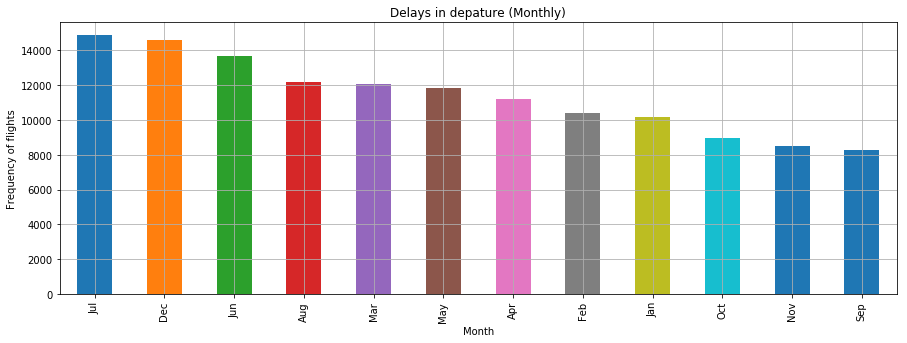

In [260]:
delayed_dep_month = delayed_dep.month.apply(lambda x: calendar.month_abbr[x])
print (delayed_dep_month.value_counts())

delayed_dep_month.value_counts().plot(kind="bar", figsize=(15,5), grid = True)
plt.title("Delays in depature (Monthly)")
plt.xlabel("Month")
plt.ylabel("Frequency of flights")

- How many flights departed on Time (on daily basis) ?

Ans: On 1st January 59 flights departed on time and so on we can measure for each day of each month.

In [261]:
dep_ontime = flight_df[flight_df['dep_delay'] == 0]
dep_ontime_day = pd.pivot_table(dep_ontime, index=['month','day'], values=['dep_delay'], aggfunc='count')
dep_ontime_day.head()

dep_delay
month day           
1     1           59
      2           65
      3           61
      4           53
      5           47

- Flights departed on time per month and plotting the result.

Aug    1539
Dec    1491
Oct    1470
Jul    1432
Mar    1432
Jan    1409
May    1393
Nov    1380
Jun    1317
Apr    1243
Sep    1239
Feb    1169
Name: month, dtype: int64


Text(0,0.5,'Frequency of flights')

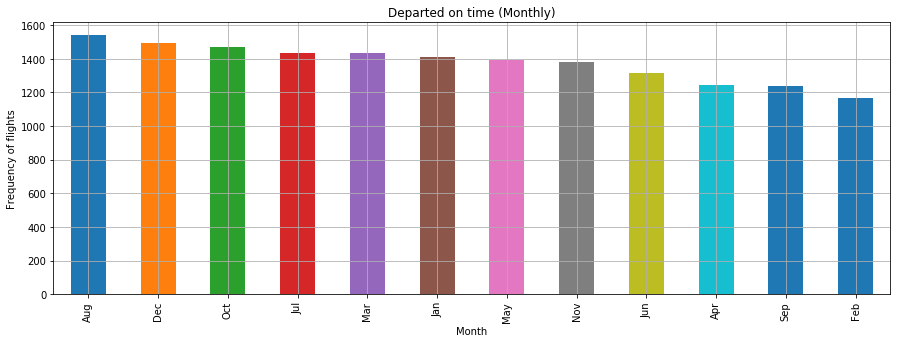

In [262]:
dep_ontime_month = dep_ontime.month.apply(lambda x: calendar.month_abbr[x])
print (dep_ontime_month.value_counts())

dep_ontime_month.value_counts().plot(kind="bar", figsize=(15,5), grid = True)
plt.title("Departed on time (Monthly)")
plt.xlabel("Month")
plt.ylabel("Frequency of flights")

- How many flights departed early (On daily basis) ?

In [263]:
dep_early = flight_df[flight_df['dep_delay'] < 0]
dep_early_day = pd.pivot_table(dep_early, index=['month','day'], values=['dep_delay'], aggfunc='count')
dep_early_day.tail()

dep_delay
month day           
12    27         463
      28         429
      29         342
      30         487
      31         431

- Flights departed early per month and plotting the result.

Oct    18461
Sep    18068
Nov    17416
Apr    15876
Aug    15589
May    15549
Jan    15412
Mar    15332
Feb    13397
Jun    13262
Jul    13144
Dec    12069
Name: month, dtype: int64


Text(0,0.5,'Frequency of flights')

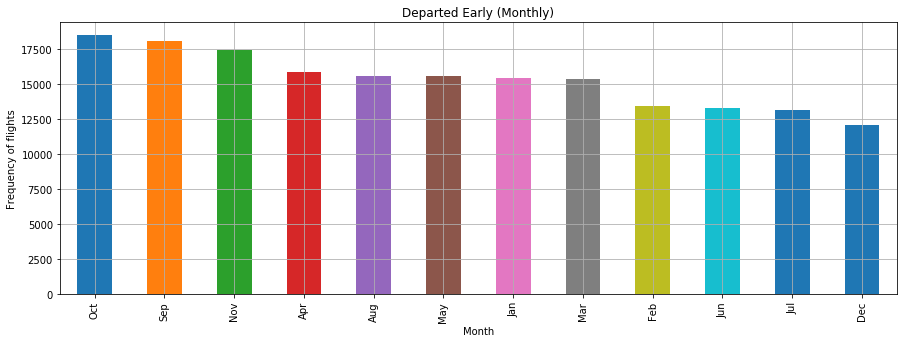

In [264]:
dep_early_month = dep_early.month.apply(lambda x: calendar.month_abbr[x])
print (dep_early_month.value_counts())

dep_early_month.value_counts().plot(kind="bar", figsize=(15,5), grid = True)
plt.title("Departed Early (Monthly)")
plt.xlabel("Month")
plt.ylabel("Frequency of flights")

- Getting side-by-side visuals of Departure Delays, Departure on-time and Early Departure

Text(0.5,1,'Departed Early (Monthly)')

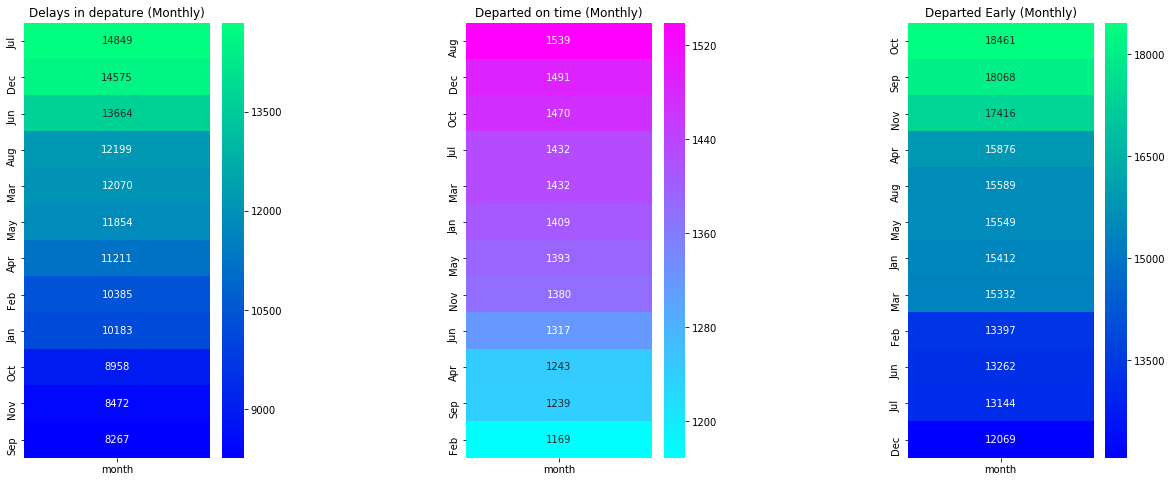

In [265]:
plt.figure(1, figsize=(20,8))
plt.subplots_adjust(hspace= 0.2, wspace= 0.9)

plt.subplot(1,3,1)
sns.heatmap(pd.DataFrame(delayed_dep_month.value_counts()), cmap="winter", annot=True, fmt="d")
plt.title("Delays in depature (Monthly)")

plt.subplot(1,3,2)
sns.heatmap(pd.DataFrame(dep_ontime_month.value_counts()), cmap="cool", annot=True, fmt="d")
plt.title("Departed on time (Monthly)")

plt.subplot(1,3,3)
sns.heatmap(pd.DataFrame(dep_early_month.value_counts()), cmap="winter", annot=True, fmt="d")
plt.title("Departed Early (Monthly)")

- How many flights got delayed while arriving (on daily basis) ?

In [266]:
delayed_arr = flight_df[flight_df['arr_delay'] > 0]
delayed_arr_day = pd.pivot_table(delayed_arr, index=['month','day'], values=['arr_delay'], aggfunc='count')
delayed_arr_day.head()

arr_delay
month day           
1     1          472
      2          550
      3          474
      4          304
      5          241

- Maximum and Minimum number of delayed Arrival flights in a day ?

Ans: Max: On 8th March Maximum number flights got delayed while Arrival - 896 Flights,
     Min: On 7th September Minimum number of Flights got delayed while Arrival - 67 Flights

In [267]:
print (delayed_arr_day.max(), delayed_arr_day.idxmax())

print (delayed_arr_day.min(), delayed_arr_day.idxmin())

arr_delay    896
dtype: int64 arr_delay    (3, 8)
dtype: object
arr_delay    67
dtype: int64 arr_delay    (9, 7)
dtype: object


- we can also get total number of flights got delayed while arrival over a period of month for better visuals

Dec    15509
Jul    14436
Jun    13658
Apr    13288
Aug    12200
Mar    11851
Jan    11756
Feb    11440
May    10857
Oct    10094
Nov     9936
Sep     7409
Name: month, dtype: int64


Text(0,0.5,'Frequency of flights')

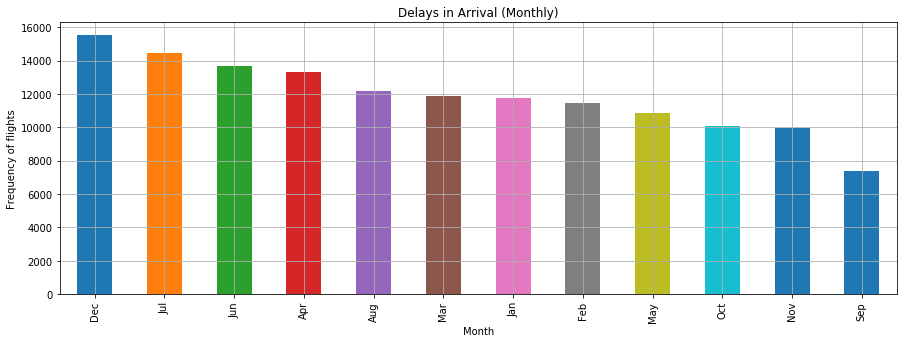

In [268]:
delayed_arr_month = delayed_arr.month.apply(lambda x: calendar.month_abbr[x])
print (delayed_arr_month.value_counts())

delayed_arr_month.value_counts().plot(kind="bar", figsize=(15,5), grid = True)
plt.title("Delays in Arrival (Monthly)")
plt.xlabel("Month")
plt.ylabel("Frequency of flights")

- Flights Arrived on time (On daily basis)

In [269]:
arr_ontime = flight_df[flight_df['arr_delay'] == 0]
arr_ontime_day = pd.pivot_table(arr_ontime, index=['month','day'], values=['arr_delay'], aggfunc='count')
arr_ontime_day.head()

arr_delay
month day           
1     1           13
      2           19
      3           25
      4           13
      5           18

- Flights arrived on time (on monthly basis)

Aug    1539
Dec    1491
Oct    1470
Jul    1432
Mar    1432
Jan    1409
May    1393
Nov    1380
Jun    1317
Apr    1243
Sep    1239
Feb    1169
Name: month, dtype: int64


Text(0,0.5,'Frequency of flights')

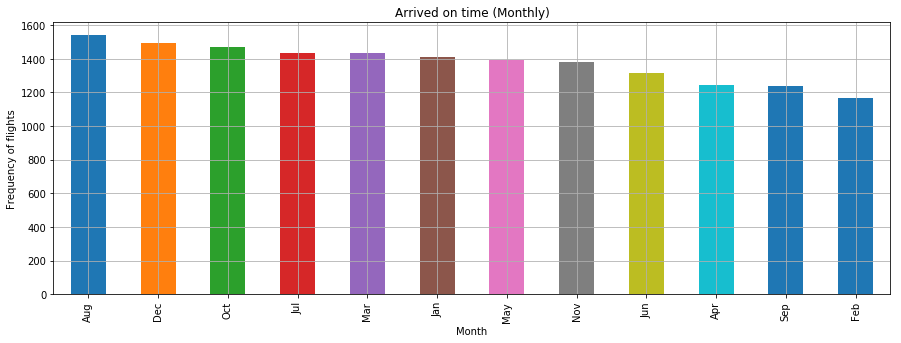

In [270]:
arr_ontime_month = arr_ontime.month.apply(lambda x: calendar.month_abbr[x])
print (dep_ontime_month.value_counts())

dep_ontime_month.value_counts().plot(kind="bar", figsize=(15,5), grid = True)
plt.title("Arrived on time (Monthly)")
plt.xlabel("Month")
plt.ylabel("Frequency of flights")

- Flights arrived early (on daily basis)

In [271]:
arr_early = flight_df[flight_df['arr_delay'] < 0]
arr_early_day = pd.pivot_table(arr_early, index=['month','day'], values=['arr_delay'], aggfunc='count')
arr_early_day.tail()

arr_delay
month day           
12    27         572
      28         541
      29         389
      30         440
      31         352

- Flights arrived early (on monthly basis)

Sep    19781
Oct    18266
May    17559
Nov    16814
Aug    16649
Mar    16553
Jan    14743
Jul    14588
Apr    14576
Jun    14179
Feb    13099
Dec    12126
Name: month, dtype: int64


Text(0,0.5,'Frequency of flights')

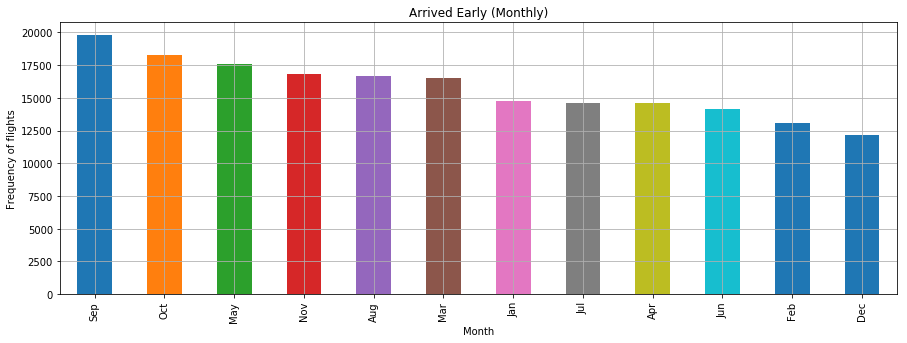

In [272]:
arr_early_month = arr_early.month.apply(lambda x: calendar.month_abbr[x])
print (arr_early_month.value_counts())

arr_early_month.value_counts().plot(kind="bar", figsize=(15,5), grid = True)
plt.title("Arrived Early (Monthly)")
plt.xlabel("Month")
plt.ylabel("Frequency of flights")

- Getting side-by-side visuals of Arrival Delay, Arrival On-time and Early Arrival

Text(0.5,1,'Arrived Early (Monthly)')

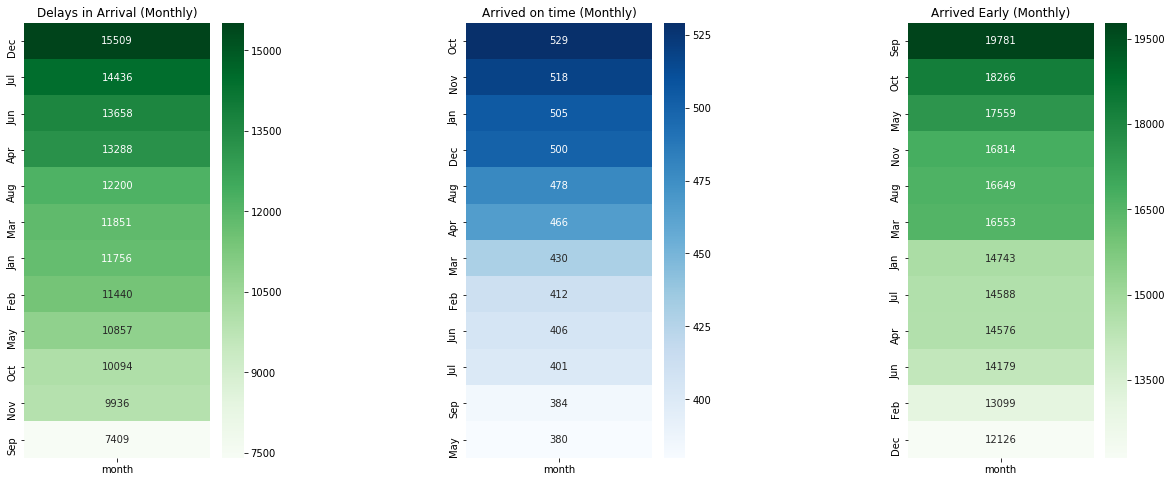

In [273]:
plt.figure(1, figsize=(20,8))
plt.subplots_adjust(hspace= 0.2, wspace= 0.9)

plt.subplot(1,3,1)
sns.heatmap(pd.DataFrame(delayed_arr_month.value_counts()), annot=True, cmap="Greens", fmt="d")
plt.title("Delays in Arrival (Monthly)")

plt.subplot(1,3,2)
sns.heatmap(pd.DataFrame(arr_ontime_month.value_counts()), annot=True, cmap="Blues", fmt="d")
plt.title("Arrived on time (Monthly)")

plt.subplot(1,3,3)
sns.heatmap(pd.DataFrame(arr_early_month.value_counts()), annot=True, cmap="Greens", fmt="d")
plt.title("Arrived Early (Monthly)")

- 3 major Airports of NY are JFK, LGA and EWR
    
Let us find out number of flights took off from these respective airports every month

Jul    10023
Aug     9983
Mar     9697
Jun     9472
May     9397
Apr     9218
Jan     9161
Dec     9146
Oct     9143
Sep     8908
Nov     8710
Feb     8421
Name: month, dtype: int64


Text(0.5,1,'JFK Graph')

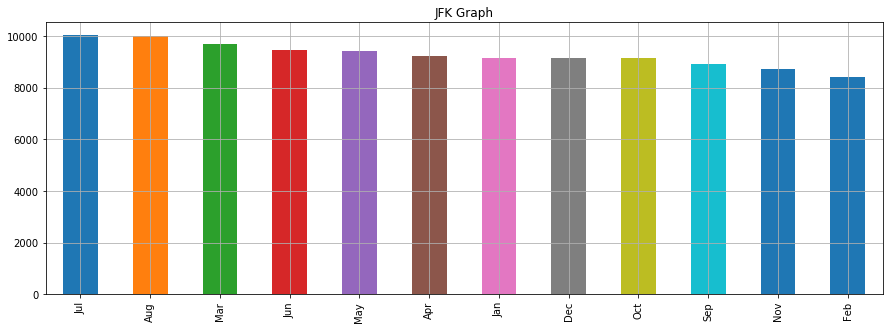

In [274]:
jfk_origin = flight_df[flight_df.origin == 'JFK']
jfk_origin_count = jfk_origin.month.apply(lambda x: calendar.month_abbr[x]).value_counts()
print (jfk_origin_count)
jfk_origin_count.plot(kind="bar", grid=True, figsize=(15,5))
plt.title("JFK Graph")

Oct    9642
Sep    9116
Dec    9067
Aug    8985
Jul    8927
Nov    8851
May    8807
Mar    8717
Jun    8596
Apr    8581
Jan    7950
Feb    7423
Name: month, dtype: int64


Text(0.5,1,'LGA Graph')

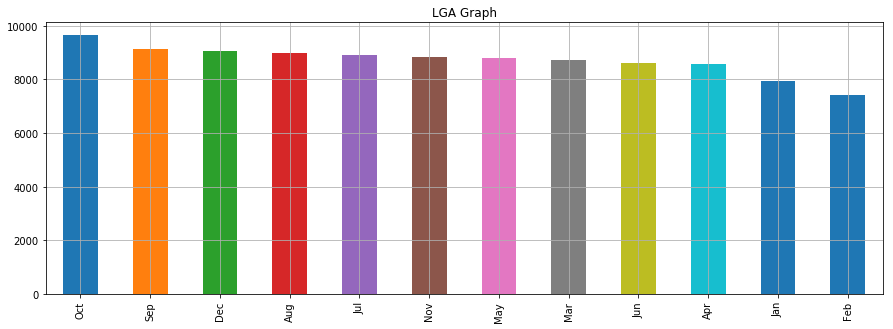

In [275]:
lga_origin = flight_df[flight_df.origin == 'LGA']
lga_origin_count = lga_origin.month.apply(lambda x: calendar.month_abbr[x]).value_counts()
print (lga_origin_count)
lga_origin_count.plot(kind="bar", grid=True, figsize=(15,5))
plt.title("LGA Graph")

May    10592
Apr    10531
Jul    10475
Mar    10420
Aug    10359
Jun    10175
Oct    10104
Dec     9922
Jan     9893
Nov     9707
Sep     9550
Feb     9107
Name: month, dtype: int64


Text(0.5,1,'EWR Graph')

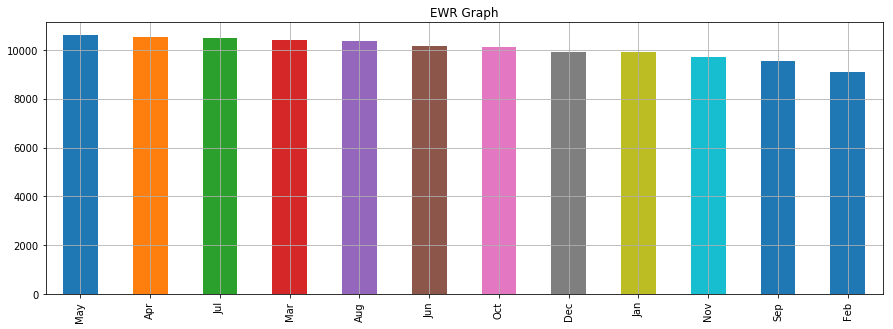

In [276]:
ewr_origin = flight_df[flight_df.origin == 'EWR']
ewr_origin_count = ewr_origin.month.apply(lambda x: calendar.month_abbr[x]).value_counts()
print (ewr_origin_count)
ewr_origin_count.plot(kind="bar", grid=True, figsize=(15,5))
plt.title("EWR Graph")

- Comparision of JFK, LGA and EWA

Ans: 3 of these airports are telling us different stories

Text(0.5,1,'EWR')

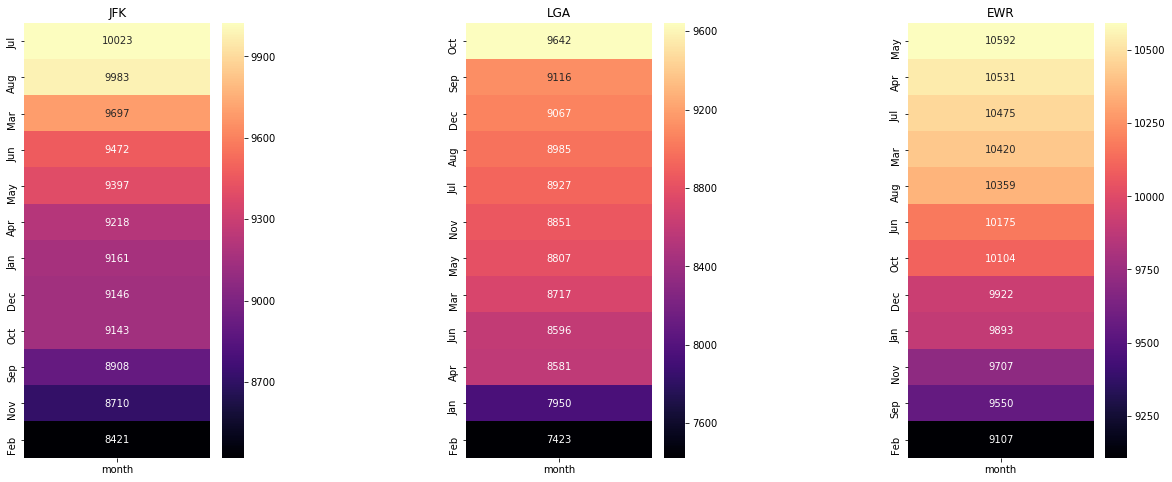

In [277]:
plt.figure(1, figsize=(20,8))
plt.subplots_adjust(hspace= 0.2, wspace= 0.9)

plt.subplot(1,3,1)
sns.heatmap(pd.DataFrame(jfk_origin_count), cmap="magma", annot=True, fmt="d")
plt.title("JFK")

plt.subplot(1,3,2)
sns.heatmap(pd.DataFrame(lga_origin_count), cmap="magma", annot=True, fmt="d")
plt.title("LGA")

plt.subplot(1,3,3)
sns.heatmap(pd.DataFrame(ewr_origin_count), cmap="magma", annot=True, fmt="d")
plt.title("EWR")

- Various Carriers/Airlines spotted over the course of year and finding out outliers (Considering 50% and above)

In [278]:
co = pd.pivot_table(flight_df, index=['carrier'], values=['month'], aggfunc='count')
co.reset_index(inplace=True)
print (co)
co.describe()

   carrier  month
0       9E  18460
1       AA  32729
2       AS    714
3       B6  54635
4       DL  48110
5       EV  54173
6       F9    685
7       FL   3260
8       HA    342
9       MQ  26397
10      OO     32
11      UA  58665
12      US  20536
13      VX   5162
14      WN  12275
15      YV    601


,month
count,16.000000
mean,21048.500000
std,22071.274647
min,32.000000
25%,706.750000
50%,15367.500000
75%,36574.250000
max,58665.000000


   carrier  month
0       9E  18460
1       AA  32729
3       B6  54635
4       DL  48110
5       EV  54173
9       MQ  26397
11      UA  58665
12      US  20536


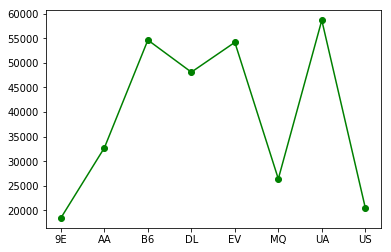

{'boxes': [<matplotlib.lines.Line2D at 0x16e042c8a90>],
 'caps': [<matplotlib.lines.Line2D at 0x16e042c8080>,
 'fliers': [<matplotlib.lines.Line2D at 0x16e042c03c8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x16e042c07f0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x16e042c8940>,
  <matplotlib.lines.Line2D at 0x16e042c84a8>]}

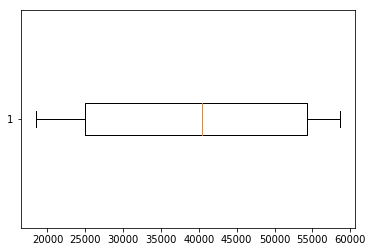

In [279]:
carr_out = co[co['month'] > 15367]
print (carr_out)
plt.plot(carr_out.carrier, carr_out.month, color='g', marker='o')
plt.show()
plt.boxplot(carr_out.month,0, 'rs', 0, 0.75)

- Months in which Airports experience enormous travellers ?

Ans: July and August are the months when Airlines experience enormous travellers.

Jul    29425
Aug    29327
Oct    28889
Mar    28834
May    28796
Apr    28330
Jun    28243
Dec    28135
Sep    27574
Nov    27268
Jan    27004
Feb    24951
Name: month, dtype: int64


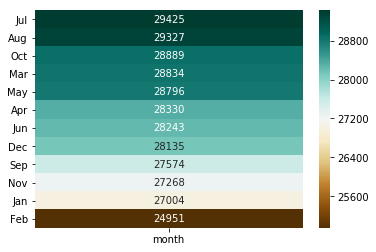

In [280]:
month = flight_df['month'].apply(lambda x: calendar.month_abbr[x])
monthly_flights = month.value_counts()
print (monthly_flights)
sns.heatmap(pd.DataFrame(monthly_flights), cmap="BrBG", annot=True, fmt="d")

- Delayed departure and Delayed arrival plot

Text(0.5,1,'Departure V/S Arrival (Delay)')

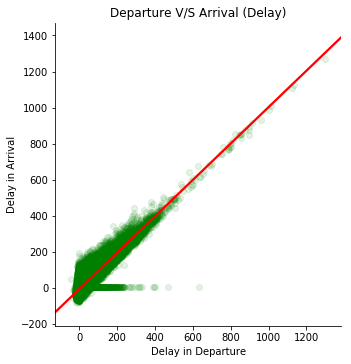

In [281]:
sns.lmplot(x='dep_delay', y='arr_delay', data=flight_df, aspect=1.0, scatter_kws={'color':'g','alpha':0.1}, line_kws={'color':'r'})
plt.xlabel("Delay in Departure")
plt.ylabel("Delay in Arrival")
plt.title("Departure V/S Arrival (Delay)")

- Finding out which airplane (by flight number) had maximum airtime (75%)

In [282]:
airtime = pd.pivot_table(flight_df, index=['flight','carrier'], values=['air_time'])
airtime_outlier = airtime[airtime['air_time'] > 188]
airtime_outlier

air_time
flight carrier            
1      AA       325.862800
       DL       190.833333
3      AA       325.481230
       B6       197.976980
5      AS       326.155039
6      DL       273.796081
7      AS       326.460536
       WN       238.000000
10     UA       204.666667
11     AS       331.318919
       VX       347.731794
12     UA       273.000000
15     AS       322.396825
       B6       253.323367
       UA       604.490736
       US       277.000000
16     WN       200.968037
17     DL       324.360577
       US       273.913904
18     UA       341.000000
19     AA       325.896319
       US       283.388889
20     WN       217.860854
21     AA       321.521688
       AS       315.473180
22     WN       280.600000
23     B6       320.393568
       VX       347.240056
25     VX       345.857143
27     US       304.333333
...                    ...
3438   WN       195.000000
3461   WN       218.000000
3482   WN       216.666667
3483   WN       223.785714
3580   WN       227.466667
3584   WN       201.000000
3588   WN       249.200000
3616   WN       202.589549
3658   WN       198.137292
3736   WN       232.000000
3750   WN       209.600000
3778   WN       242.282051
3834   WN       237.500000
3865   WN       232.000000
3878   WN       226.000000
3952   WN       218.334498
3995   WN       228.000000
3996   WN       218.875000
4103   WN       277.694444
4106   WN       229.000000
4112   WN       221.800000
4187   WN       224.000000
4204   EV       190.376407
4208   WN       222.000000
4241   WN       220.000000
4313   WN       206.000000
4381   WN       197.952381
4454   WN       236.000000
4859   WN       330.000000
4976   WN       219.000000

[1387 rows x 1 columns]

- Finding out hour when most flights (on an average) get delayed while departing.

In [283]:
hourly_delay_dep = pd.pivot_table(delayed_dep, index=['hour'], values=['dep_delay'], aggfunc="mean")
hourly_delay_dep_sort = hourly_delay_dep.sort_values(by="dep_delay")
hourly_delay_dep_sort

,dep_delay
hour,
1,12.639070
5,15.220385
6,23.319147
7,23.436156
9,28.752400
8,28.806066
12,31.172743
11,31.356879
10,31.534276


Text(0.5,1,'Minimum to Maximum - Average Number of Flight getting Delayed while Departing in a specific Hour')

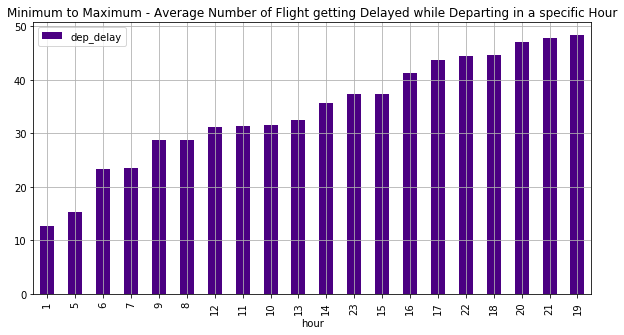

In [284]:
hourly_delay_dep_sort.plot(kind="bar", figsize=(10,5), grid=True, color='indigo')
plt.title("Minimum to Maximum - Average Number of Flight getting Delayed while Departing in a specific Hour")

- Finding out hour when most flights (on an average) get delayed while arrival.

In [285]:
hourly_delay_arr = pd.pivot_table(delayed_arr, index=['hour'], values=['arr_delay'], aggfunc="mean")
hourly_delay_arr_sort = hourly_delay_arr.sort_values(by="arr_delay")
hourly_delay_arr_sort

,arr_delay
hour,
1,6.895377
5,18.075764
6,21.799358
7,23.756743
9,27.378212
8,27.520349
10,30.467651
11,31.274825
12,31.414853


Text(0.5,1,'Minimum to Maximum - Average Number of Flight getting Delayed on Arrival in a specific Hour')

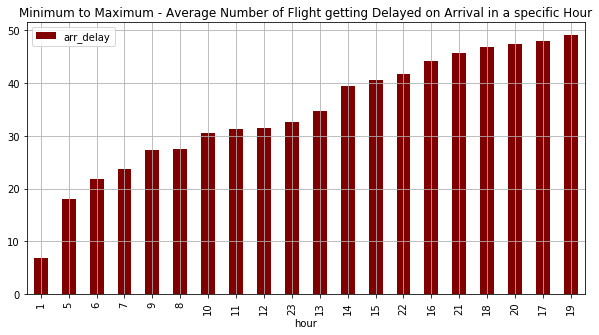

In [286]:
hourly_delay_arr_sort.plot(kind="bar", figsize=(10,5), grid=True, color='maroon')
plt.title("Minimum to Maximum - Average Number of Flight getting Delayed on Arrival in a specific Hour")

- Distance covered

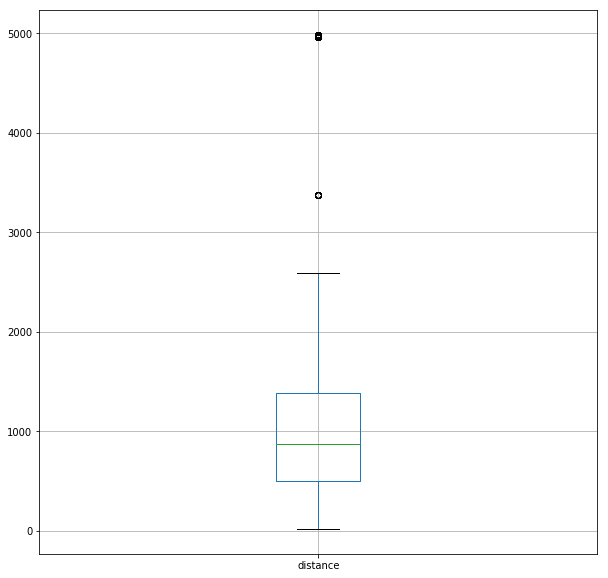

In [287]:
plt.figure(1, figsize=(10,10))
pd.DataFrame(flight_df['distance']).boxplot()

- Average distance covered by a flight over the course of time

In [288]:
distance = pd.pivot_table(flight_df, index=['tailnum','carrier','origin','dest'], values=['distance'])
distance

distance
tailnum carrier origin dest          
D942DN  DL      JFK    MCO      944.0
                LGA    ATL      762.0
                       MCO      950.0
N0EGMQ  MQ      EWR    ORD      719.0
                JFK    CMH      483.0
                       DCA      213.0
                       TPA     1005.0
                LGA    ATL      762.0
                       BNA      764.0
                       CLE      419.0
                       CLT      544.0
                       CMH      479.0
                       DTW      502.0
                       MSP     1020.0
                       RDU      431.0
                       STL      888.0
                       XNA     1147.0
N10156  EV      EWR    ATL      746.0
                       AVL      583.0
                       BDL      116.0
                       BNA      748.0
                       BTV      266.0
                       BWI      169.0
                       CHS      628.0
                       CLT      529.0
                       CMH      463.0
                       CVG      569.0
                       DAY      533.0
                       DCA      199.0
                       DSM     1017.0
...                               ...
N998DL  DL      LGA    PIT      335.0
                       TPA     1010.0
N999DN  DL      EWR    ATL      746.0
                JFK    BOS      187.0
                       FLL     1069.0
                       MCO      944.0
                       MIA     1089.0
                       TPA     1005.0
                LGA    ATL      762.0
                       DTW      502.0
                       FLL     1076.0
                       MCO      950.0
                       MIA     1096.0
                       MSP     1020.0
                       PBI     1035.0
                       SRQ     1047.0
                       TPA     1010.0
N9EAMQ  MQ      EWR    ORD      719.0
                JFK    CMH      483.0
                       DCA      213.0
                       TPA     1005.0
                LGA    ATL      762.0
                       BNA      764.0
                       CLE      419.0
                       CLT      544.0
                       CMH      479.0
                       DTW      502.0
                       MSP     1020.0
                       RDU      431.0
                       STL      888.0

[52805 rows x 1 columns]

- Maximum and Minimum Average Distance covered by any Flight (based on Tailnum)

Ans: Flight with tailnum N380HA of "HA" airline covered MAX average distance, Flight with tailnum N10575 of "EV" airline covered MIN average distance.

In [289]:
print (distance.max(), distance.idxmax())

print (distance.min(), distance.idxmin())

distance    4983.0
dtype: float64 distance    (N380HA, HA, JFK, HNL)
dtype: object
distance    17.0
dtype: float64 distance    (N725MQ, US, EWR, LGA)
dtype: object


- Which is the most frequently travelling Airplane ? 

Ans: N725MQ is most frquently travelling plane

In [290]:
flight_df['tailnum'].value_counts()

N725MQ    3087
N722MQ     513
N723MQ     507
N711MQ     486
N713MQ     483
N258JB     427
N298JB     407
N353JB     404
N351JB     402
N735MQ     396
N328AA     393
N338AA     388
N228JB     388
N327AA     387
N335AA     385
N0EGMQ     371
N324JB     370
N274JB     370
N534MQ     364
N229JB     364
N542MQ     363
N190JB     362
N183JB     361
N323AA     357
N296JB     357
N249JB     355
N319AA     354
N336AA     353
N247JB     350
N531MQ     349
          ... 
N790SK       1
N350SW       1
N824AS       1
N918DH       1
N521SW       1
N772SK       1
N777UA       1
N941DN       1
N785SK       1
N8619F       1
N206UA       1
N809AW       1
N907DA       1
N978SW       1
N632AW       1
N315AS       1
N14628       1
N631AW       1
N955DN       1
N728SK       1
N657UA       1
N3LDAA       1
N957DN       1
N655UA       1
N627AW       1
N856NW       1
N932DN       1
N910DN       1
N306AS       1
N660SW       1
Name: tailnum, Length: 4043, dtype: int64

- Finding most popular carrier for JFK, LGA and EWR Airport and plotting the results side-by-side

In [291]:
jfk_origin.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,speed
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00,218.466667
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00,315.950000
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,01-01-2013 06:00,157.333333
10,2013,1,1,558.0,600,-2.0,849.0,851,-2.0,B6,49,N793JB,JFK,PBI,149.0,1028,6,0,01-01-2013 06:00,171.333333
11,2013,1,1,558.0,600,-2.0,853.0,856,-3.0,B6,71,N657JB,JFK,TPA,158.0,1005,6,0,01-01-2013 06:00,167.500000


In [292]:
jfk_origin['carrier'].value_counts()

B6    42076
DL    20701
9E    14651
AA    13783
MQ     7193
UA     4534
VX     3596
US     2995
EV     1408
HA      342
Name: carrier, dtype: int64

In [293]:
lga_origin.tail()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,speed
336770,2013,9,30,1349.109947,1842,12.63907,1502.054999,2019,6.895377,EV,5274,N740EV,LGA,BNA,150.68646,764,18,42,30-09-2013 18:00,43.144444
336772,2013,9,30,1349.109947,2200,12.63907,1502.054999,2312,6.895377,9E,3525,N725MQ,LGA,SYR,150.68646,198,22,0,30-09-2013 22:00,9.000000
336773,2013,9,30,1349.109947,1210,12.63907,1502.054999,1330,6.895377,MQ,3461,N535MQ,LGA,BNA,150.68646,764,12,10,30-09-2013 12:00,63.833333
336774,2013,9,30,1349.109947,1159,12.63907,1502.054999,1344,6.895377,MQ,3572,N511MQ,LGA,CLE,150.68646,419,11,59,30-09-2013 11:00,39.074242
336775,2013,9,30,1349.109947,840,12.63907,1502.054999,1020,6.895377,MQ,3531,N839MQ,LGA,RDU,150.68646,431,8,40,30-09-2013 08:00,54.541667


In [294]:
lga_origin['carrier'].value_counts()

DL    23067
MQ    16928
AA    15459
US    13136
EV     8826
UA     8044
WN     6087
B6     6002
FL     3260
9E     2541
F9      685
YV      601
OO       26
Name: carrier, dtype: int64

In [295]:
ewr_origin.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,speed
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00,280.250000
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,01-01-2013 05:00,144.766667
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,01-01-2013 06:00,177.500000
13,2013,1,1,558.0,600,-2.0,923.0,937,-14.0,UA,1124,N53441,EWR,SFO,361.0,2565,6,0,01-01-2013 06:00,427.500000
16,2013,1,1,559.0,600,-1.0,854.0,902,-8.0,UA,1187,N76515,EWR,LAS,337.0,2227,6,0,01-01-2013 06:00,371.166667


In [296]:
ewr_origin['carrier'].value_counts()

UA    46087
EV    43939
B6     6557
WN     6188
US     4405
DL     4342
AA     3487
MQ     2276
VX     1566
9E     1268
AS      714
OO        6
Name: carrier, dtype: int64

Text(0.5,1,'EWR')

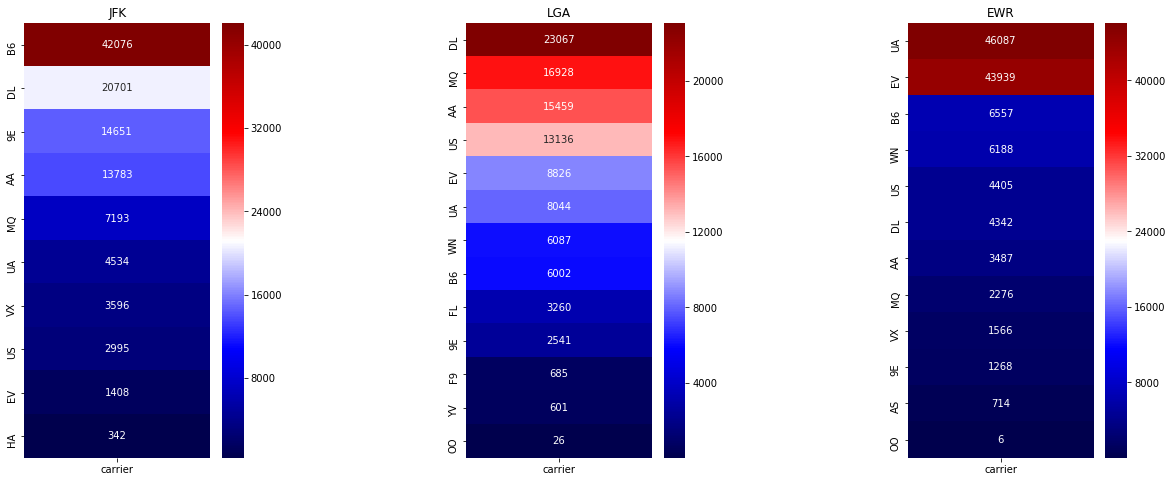

In [297]:
plt.figure(1, figsize=(20,8))
plt.subplots_adjust(hspace= 0.2, wspace= 0.9)

plt.subplot(1,3,1)
sns.heatmap(pd.DataFrame(jfk_origin['carrier'].value_counts()), cmap="seismic", annot=True, fmt="d")
plt.title("JFK")

plt.subplot(1,3,2)
sns.heatmap(pd.DataFrame(lga_origin['carrier'].value_counts()), cmap="seismic", annot=True, fmt="d")
plt.title("LGA")

plt.subplot(1,3,3)
sns.heatmap(pd.DataFrame(ewr_origin['carrier'].value_counts()), cmap="seismic", annot=True, fmt="d")
plt.title("EWR")

- Most frequently travelled Destination from JFK, LGA, EWR

In [298]:
print ("Most travelled Destination from JFK Airport: "+ jfk_origin['dest'].mode())
print ("Most travelled Destination LGA Airport: "+ lga_origin['dest'].mode())
print ("Most travelled Destination EWR Airport: "+ ewr_origin['dest'].mode())

0    Most travelled Destination from JFK Airport: LAX
dtype: object
0    Most travelled Destination LGA Airport: ATL
dtype: object
0    Most travelled Destination EWR Airport: ORD
dtype: object


- Now, based on most frequently travelled destination from each of these airports let us figure out the frequency of flights travellng to these respective destinations

# JFK

In [299]:
jfk_to_lax = jfk_origin[jfk_origin['dest']=="LAX"]
jfk_to_lax.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,speed
12,2013,1,1,558.0,600,-2.0,924.0,917,7.0,UA,194,N29129,JFK,LAX,345.0,2475,6,0,01-01-2013 06:00,412.500000
63,2013,1,1,658.0,700,-2.0,1027.0,1025,2.0,VX,399,N627VA,JFK,LAX,361.0,2475,7,0,01-01-2013 07:00,353.571429
69,2013,1,1,702.0,700,2.0,1058.0,1014,44.0,B6,671,N779JB,JFK,LAX,381.0,2475,7,0,01-01-2013 07:00,353.571429
91,2013,1,1,743.0,730,13.0,1107.0,1100,7.0,AA,33,N338AA,JFK,LAX,358.0,2475,7,30,01-01-2013 07:00,354.071429
139,2013,1,1,829.0,830,-1.0,1152.0,1200,-8.0,UA,443,N554UA,JFK,LAX,360.0,2475,8,30,01-01-2013 08:00,309.875000


- Total number of flights travelling to LAX from JFK over the course of time

In [300]:
jfk_lax_monthly = jfk_to_lax.month.apply(lambda x: calendar.month_abbr[x]).value_counts()
jfk_lax_monthly

Jul    985
Aug    979
Oct    965
Mar    960
May    960
Dec    947
Jan    937
Apr    935
Jun    928
Sep    925
Nov    907
Feb    834
Name: month, dtype: int64

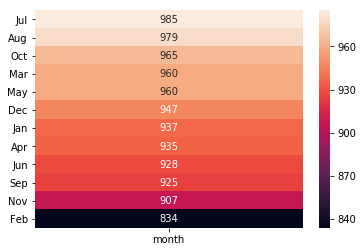

In [301]:
sns.heatmap(pd.DataFrame(jfk_lax_monthly), annot=True, fmt="d")

- Carriers which are most probably delayed in Departing from JFK --> LAX

Text(0,0.5,'Delay (In Minutes)')

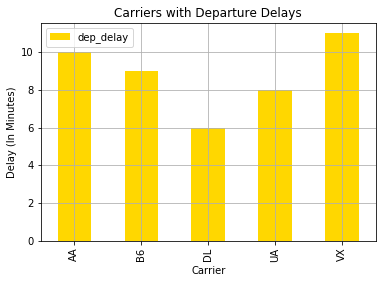

In [302]:
deldep_carriers_jfk_lax = pd.pivot_table(jfk_to_lax, index=['carrier'], values=['dep_delay'], aggfunc="mean")
pd.DataFrame(deldep_carriers_jfk_lax.round()).plot(kind="bar", grid=True, color="gold")
plt.title("Carriers with Departure Delays")
plt.xlabel("Carrier")
plt.ylabel("Delay (In Minutes)")

- Carriers which are most probably delayed in Arrival from JFK --> LAX

Text(0,0.5,'Delay (In Minutes)')

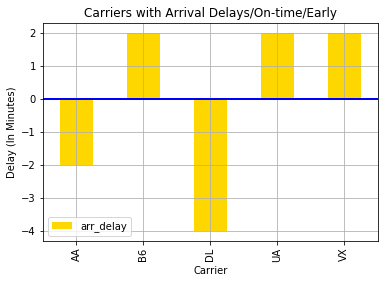

In [303]:
delarr_carriers_jfk_lax = pd.pivot_table(jfk_to_lax, index=['carrier'], values=['arr_delay'], aggfunc="mean")
pd.DataFrame(delarr_carriers_jfk_lax.round()).plot(kind="bar", grid=True, color="gold")
plt.axhline(y=0, linewidth=2, color="b")
plt.title("Carriers with Arrival Delays/On-time/Early")
plt.xlabel("Carrier")
plt.ylabel("Delay (In Minutes)")

- Average time required for any airplane to travel to LAX from JFK

In [304]:
print ("Average time + speed took by a plane to reach LAX from JFK (in Minutes): ", jfk_to_lax[['air_time','speed']].mean())

Average time + speed took by a plane to reach LAX from JFK (in Minutes):  air_time    327.518887
speed       211.400335
dtype: float64


- Which plane took Maximum time while travelling to LAX from JFK ?

Ans: As we can see the flight with tailnum "N178DN" of "DL" airlines departed early from JFK but reached 76 mins lately at LAX spending 444 minutes in air.

In [305]:
print (jfk_to_lax['air_time'].idxmax())
flight_df[76185:76186][['tailnum','carrier','dep_delay','arr_delay','air_time','origin','dest']]

76185


,tailnum,carrier,dep_delay,arr_delay,air_time,origin,dest
76185,N178DN,DL,-3.0,76.0,440.0,JFK,LAX


-  Which plane took Minimum time while travelling to LAX from JFK ?

Ans: As we can see the flight with tailnum "N725MQ" of "AA" airlines got delayed while departing and arriving but reached LAX in 151 mins which is even less than average time required to fly LAX ,i.e, 328 mins.

In [306]:
print (jfk_to_lax['air_time'].idxmin())
flight_df[1782:1783][['tailnum','carrier','dep_delay','arr_delay','air_time','origin','dest']]

1782


,tailnum,carrier,dep_delay,arr_delay,air_time,origin,dest
1782,N725MQ,AA,12.63907,6.895377,150.68646,JFK,LAX


- Carrier's Frequency JFK --> LAX

In [307]:
carr_freq_jfk_lax = jfk_to_lax['carrier'].value_counts()
carr_freq_jfk_lax

AA    3217
DL    2501
UA    2059
VX    1797
B6    1688
Name: carrier, dtype: int64

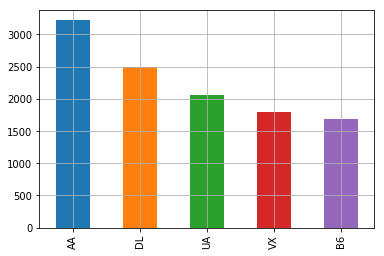

In [308]:
carr_freq_jfk_lax.plot(kind="bar", grid=True)

# LGA

In [309]:
lga_to_atl = lga_origin[lga_origin['dest']=="ATL"]
lga_to_atl.tail()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,speed
336542,2013,9,30,1752.0,1759,-7.0,2021.0,2031,-10.0,DL,61,N683DA,LGA,ATL,104.0,762,17,59,30-09-2013 17:00,45.806863
336602,2013,9,30,1851.0,1900,-9.0,2114.0,2132,-18.0,DL,947,N979DL,LGA,ATL,97.0,762,19,0,30-09-2013 19:00,40.105263
336621,2013,9,30,1903.0,1859,4.0,2125.0,2126,-1.0,FL,645,N939AT,LGA,ATL,101.0,762,18,59,30-09-2013 18:00,43.316667
336665,2013,9,30,1944.0,1950,-6.0,2208.0,2215,-7.0,MQ,3662,N507MQ,LGA,ATL,100.0,762,19,50,30-09-2013 19:00,40.938596
336670,2013,9,30,1955.0,2000,-5.0,2219.0,2230,-11.0,DL,1147,N992DL,LGA,ATL,99.0,762,20,0,30-09-2013 20:00,38.100000


- Total number of flights travelling to ATL from LGA over the course of time

In [310]:
lga_atl_monthly = lga_to_atl.month.apply(lambda x: calendar.month_abbr[x]).value_counts()
lga_atl_monthly

May    925
Apr    892
Mar    889
Jan    878
Dec    862
Aug    860
Oct    853
Jul    847
Nov    830
Jun    826
Sep    803
Feb    798
Name: month, dtype: int64

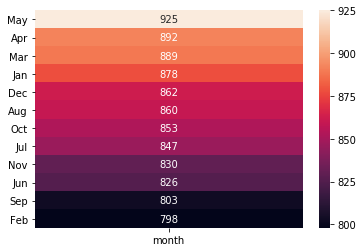

In [311]:
sns.heatmap(pd.DataFrame(lga_atl_monthly), annot=True, fmt="d")

- Carriers which are most probably delayed in Departing from LGA --> ATL

Text(0,0.5,'Delay (In Minutes)')

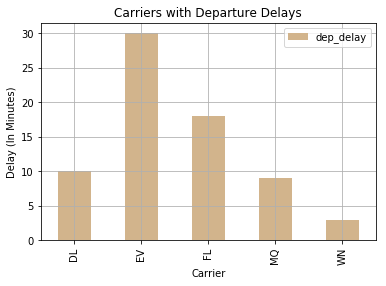

In [312]:
deldep_carriers_lga_atl = pd.pivot_table(lga_to_atl, index=['carrier'], values=['dep_delay'], aggfunc="mean")
pd.DataFrame(deldep_carriers_lga_atl.round()).plot(kind="bar", grid=True, color="tan")
plt.title("Carriers with Departure Delays")
plt.xlabel("Carrier")
plt.ylabel("Delay (In Minutes)")

- Carriers which are most probably delayed in Arrival at ATL

Text(0,0.5,'Delay (In Minutes)')

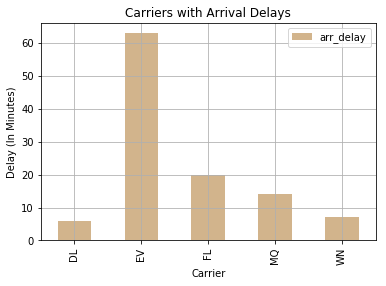

In [313]:
delarr_carriers_lga_atl = pd.pivot_table(lga_to_atl, index=['carrier'], values=['arr_delay'], aggfunc="mean")
pd.DataFrame(delarr_carriers_lga_atl.round()).plot(kind="bar", grid=True, color="tan")
plt.title("Carriers with Arrival Delays")
plt.xlabel("Carrier")
plt.ylabel("Delay (In Minutes)")

51) Average time required for any airplane to travel to LGA from ATL

In [314]:
print ("Average time + speed took by a plane to reach ATL from LGA (in Minutes): ", lga_to_atl[['air_time','speed']].mean())

Average time + speed took by a plane to reach ATL from LGA (in Minutes):  air_time    114.358218
speed        69.113744
dtype: float64


- Which plane took Maximum time while travelling to ATL from LGA ?

Ans: As we can see the flight with tailnum "N680DA" of "DL" airlines departed early from LGA but reached 28 mins lately at ATL spending 175 minutes in air.

In [315]:
print (lga_to_atl['air_time'].idxmax())
flight_df[239518:239519][['tailnum','carrier','dep_delay','arr_delay','air_time','origin','dest']]

239518


,tailnum,carrier,dep_delay,arr_delay,air_time,origin,dest
239518,N680DA,DL,-3.0,28.0,175.0,LGA,ATL


- Which plane took Minimum time while travelling to ATL from LGA ?

Ans: As we can see the flight with tailnum "N666DN" of "DL" airlines got delayed while departing but reached ATL in 65 mins which is even less than average time required to fly ATL ,i.e, 114 mins.

In [316]:
print (lga_to_atl['air_time'].idxmin())
flight_df[216447:216448][['tailnum','carrier','dep_delay','arr_delay','air_time','origin','dest']]

216447


,tailnum,carrier,dep_delay,arr_delay,air_time,origin,dest
216447,N666DN,DL,9.0,-14.0,65.0,LGA,ATL


- Carrier's Frequency LGA --> ATL

In [317]:
carr_freq_lga_atl = lga_to_atl['carrier'].value_counts()
carr_freq_lga_atl

DL    5544
FL    2337
MQ    2322
WN      59
EV       1
Name: carrier, dtype: int64

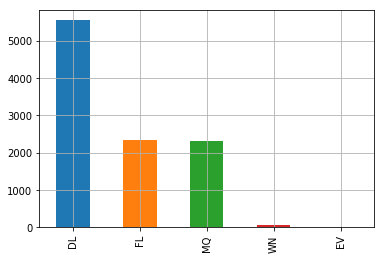

In [318]:
carr_freq_lga_atl.plot(kind="bar", grid=True)

# EWR

In [319]:
ewr_to_ord = ewr_origin[ewr_origin['dest']=="ORD"]
ewr_to_ord.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,speed
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,01-01-2013 05:00,144.766667
25,2013,1,1,608.0,600,8.0,807.0,735,32.0,MQ,3768,N9EAMQ,EWR,ORD,139.0,719,6,0,01-01-2013 06:00,119.833333
73,2013,1,1,715.0,713,2.0,911.0,850,21.0,UA,544,N841UA,EWR,ORD,156.0,719,7,13,01-01-2013 07:00,102.930952
96,2013,1,1,749.0,710,39.0,939.0,850,49.0,MQ,3737,N508MQ,EWR,ORD,148.0,719,7,10,01-01-2013 07:00,102.880952
170,2013,1,1,902.0,903,-1.0,1048.0,1045,3.0,UA,580,N820UA,EWR,ORD,145.0,719,9,3,01-01-2013 09:00,79.938889


- Total number of flights travelling to ORD from EWR over the course of time

In [320]:
ewr_ord_monthly = ewr_to_ord.month.apply(lambda x: calendar.month_abbr[x]).value_counts()
ewr_ord_monthly

Aug    582
Sep    579
Jul    564
Jun    551
May    549
Oct    515
Jan    502
Mar    493
Apr    491
Feb    475
Nov    421
Dec    378
Name: month, dtype: int64

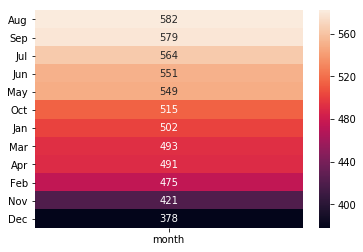

In [321]:
sns.heatmap(pd.DataFrame(ewr_ord_monthly), annot=True, fmt="d")

- Carriers which are most probably delayed in Departing from EWR --> ORD

Text(0,0.5,'Delay (In Minutes)')

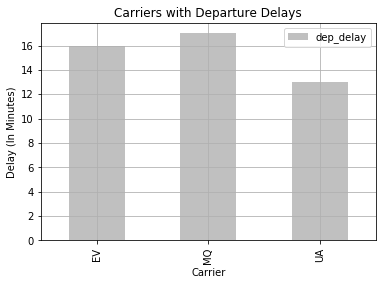

In [322]:
deldep_carriers_ewr_ord = pd.pivot_table(ewr_to_ord, index=['carrier'], values=['dep_delay'], aggfunc="mean")
pd.DataFrame(deldep_carriers_ewr_ord.round()).plot(kind="bar", grid=True, color="silver")
plt.title("Carriers with Departure Delays")
plt.xlabel("Carrier")
plt.ylabel("Delay (In Minutes)")

- Carriers which are most probably delayed in Arrival at ORD

Text(0,0.5,'Delay (In Minutes)')

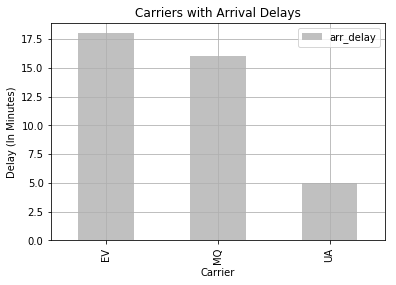

In [323]:
delarr_carriers_ewr_ord = pd.pivot_table(ewr_to_ord, index=['carrier'], values=['arr_delay'], aggfunc="mean")
pd.DataFrame(delarr_carriers_ewr_ord.round()).plot(kind="bar", grid=True, color="silver")
plt.title("Carriers with Arrival Delays")
plt.xlabel("Carrier")
plt.ylabel("Delay (In Minutes)")

- Average time required for any airplane to travel to ORD from EWR

In [324]:
print ("Average time + speed took by a plane to reach ORD from EWR (in Minutes): ", ewr_to_ord[['air_time','speed']].mean())

Average time + speed took by a plane to reach ORD from EWR (in Minutes):  air_time    114.929134
speed        65.658127
dtype: float64


- Which plane took Maximum time while travelling to ORD from EWR ?

Ans: As we can see the flight with tailnum "N14214" of "UA" airlines departed early from LGA but reached 95 mins lately at ORD spending 198 minutes in air.

In [325]:
print (ewr_to_ord['air_time'].idxmax())
flight_df[173729:173730][['tailnum','carrier','dep_delay','arr_delay','air_time','origin','dest']]

173729


,tailnum,carrier,dep_delay,arr_delay,air_time,origin,dest
173729,N14214,UA,-2.0,95.0,198.0,EWR,ORD


- Which plane took Minimum time while travelling to ORD from EWR ?

Ans: As we can see the flight with tailnum "N489UA" of "UA" airlines got delayed while departing but reached ORD in 87 mins which is even less than average time required to fly ORD ,i.e, 115 mins.

In [326]:
print (ewr_to_ord['air_time'].idxmin())
flight_df[299648:299649][['tailnum','carrier','dep_delay','arr_delay','air_time','origin','dest']]

299648


,tailnum,carrier,dep_delay,arr_delay,air_time,origin,dest
299648,N489UA,UA,9.0,-22.0,87.0,EWR,ORD


- Carrier's Frequency EWR --> ORD

In [327]:
carr_freq_ewr_ord = ewr_to_ord['carrier'].value_counts()
carr_freq_ewr_ord

UA    3822
MQ    2276
EV       2
Name: carrier, dtype: int64

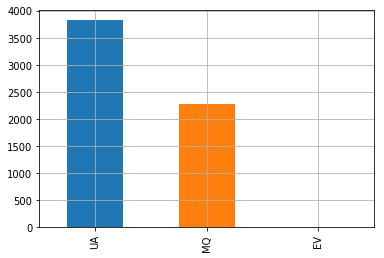

In [328]:
carr_freq_ewr_ord.plot(kind="bar", grid=True)

- Total number of Unique Flights that were observed at all the 3 NY Airports

In [329]:
unique_flights = flight_df['tailnum'].value_counts()
print ("Total number of Unique Flights :",unique_flights.count())

Total number of Unique Flights : 4043


- Which flight covered longest distance ?

Ans: As we can see below flight "51" having tail number "N380HA" of HA Airlines travelled from JFK to HNL covering 4983 Miles at the speed of 553.66 mph

In [330]:
flight_df['distance'].idxmax()

162

In [331]:
flight_df[162:163]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,speed
162,2013,1,1,857.0,900,-3.0,1516.0,1530,-14.0,HA,51,N380HA,JFK,HNL,659.0,4983,9,0,01-01-2013 09:00,553.666667


- Avg. distance covered by each Flight over the course of time

In [332]:
avg_dis = pd.pivot_table(flight_df, index=['tailnum'], values=['distance'], aggfunc="mean")
avg_dis.sort_values(by=['distance']).head(30)

,distance
tailnum,
N955UW,173.093333
N948UW,173.655172
N959UW,174.131455
N956UW,174.378378
N945UW,175.908772
N954UW,176.219409
N952UW,176.851064
N944UW,177.612613
N961UW,177.840708


- Over the course of year, How many flights did we were able to observe on each airport ?

EWR    120835
JFK    111279
LGA    104662
Name: origin, dtype: int64


([<matplotlib.patches.Wedge at 0x16e40dce400>,
 [Text(-1.15682,0.318993,'EWR Flight Count - 120835'),
  Text(0.351658,-1.04227,'JFK Flight Count - 111279'),
  Text(0.79047,0.764956,'LGA Flight Count - 104662')],
 [Text(-0.674814,0.186079,'35.88%'),
  Text(0.191814,-0.568513,'33.04%'),
  Text(0.431165,0.417249,'31.08%')])

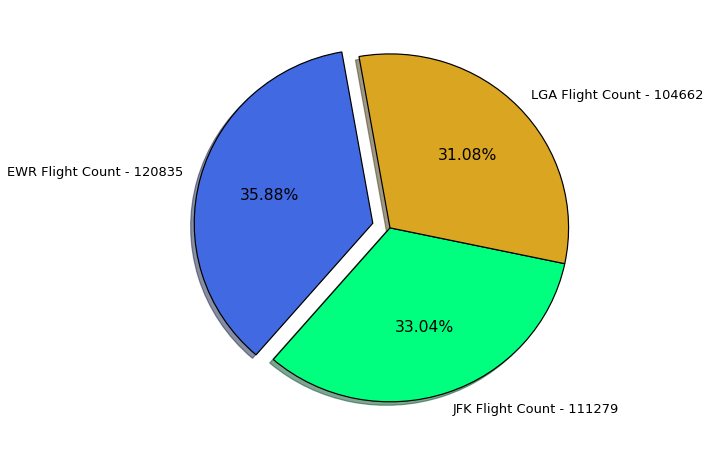

In [376]:
sns.set_context("talk")
plt.figure(figsize=(8,8))
freq = flight_df['origin'].value_counts()
print (freq)
label = ('EWR Flight Count - 120835', 'JFK Flight Count - 111279','LGA Flight Count - 104662')
color = ['royalblue','springgreen', 'goldenrod']
exp = [0.1,0,0]
plt.pie(freq, shadow=True, labels=label, autopct='%1.2f%%', colors=color, startangle=100, explode=exp, wedgeprops={"edgecolor":"k",'linewidth': 1.2, 'linestyle': 'solid', 'antialiased': True})
#plt.legend((freq.values), labels=('Count EWR','Count JFK','Count LGA'))

- Comparing Avg. Departure Delays observed every month at each Airport

In [385]:
jfk_avg_delay = pd.pivot_table(jfk_origin, index=['month'], values=['dep_delay'], aggfunc="mean")
ewr_avg_delay = pd.pivot_table(ewr_origin, index=['month'], values=['dep_delay'], aggfunc="mean")
lga_avg_delay = pd.pivot_table(lga_origin, index=['month'], values=['dep_delay'], aggfunc="mean")

C:\Users\Gaurav\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


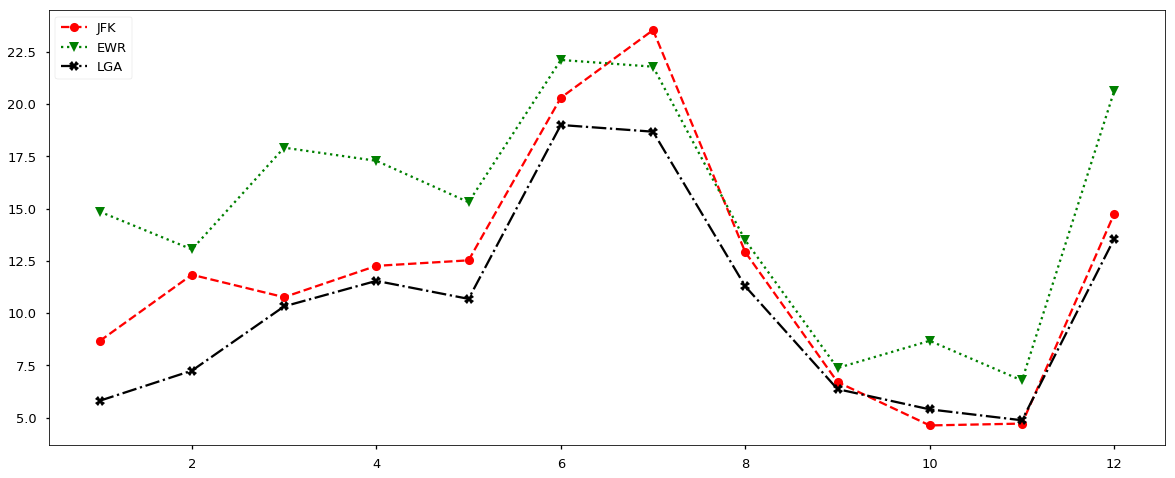

In [428]:
plt.figure(figsize=(20,8))
plt.subplot(1,1,1)
plt.plot(jfk_avg_delay, marker="o", color="r", linestyle="--")
plt.subplot(1,1,1)
plt.plot(ewr_avg_delay, marker="v", color="green", linestyle=":")
plt.subplot(1,1,1)
plt.plot(lga_avg_delay, marker="X", color="black", linestyle='-.')
plt.legend(('JFK','EWR','LGA'), loc='upper left')